In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
from pylab import savefig

In [3]:
#Loading Audio Sample
y, sr = librosa.load("Crankdat_drop.wav")
y1, sr = librosa.load("OneTwo_drop.wav")
y2, sr = librosa.load("skr_cut1.wav")
y3, sr = librosa.load("KTN_cut.wav")
y4, sr = librosa.load("KTN_cut2.wav")
y5, sr = librosa.load("piano_roll.wav")


In [4]:
len(y)


564480

In [5]:
def preprocess(y):
    y_64=np.reshape(y, (64, 8820)).T
    y_64=pd.DataFrame(y_64)
    y_64_np=y_64.values
    y_64_np=y_64_np.T
    return y_64_np


In [6]:
#feature spectral_centroid
#y_64_feature is list
def feature_get(y_64_np):
    y_64_feature=[]
    for i in range(y_64_np.shape[0]):
            y_64_feature.append(librosa.feature.spectral_centroid(y_64_np[i]))

    y_64_feature=np.array(y_64_feature)
    y_64_feature=y_64_feature[:,0,:]
    y_64_feature=pd.DataFrame(y_64_feature.T)
    
    return y_64_feature
#data cutting
y_64_feature_0_7=y_64_feature.loc[:,0:7]
y_64_feature_8_15=y_64_feature.loc[:,8:15]
y_64_feature_16_23=y_64_feature.loc[:,16:23]
y_64_feature_24_31=y_64_feature.loc[:,24:31]
y_64_feature_4_8beat=y_64_feature.loc[:,0:31]


NameError: name 'y_64_feature' is not defined

In [8]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(30, 30))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [9]:
import pandas as pd
import seaborn as sns
def clusterMap(df,fig):
    sns.set()
    sns.clustermap(df.corr()).savefig(fig+".png")

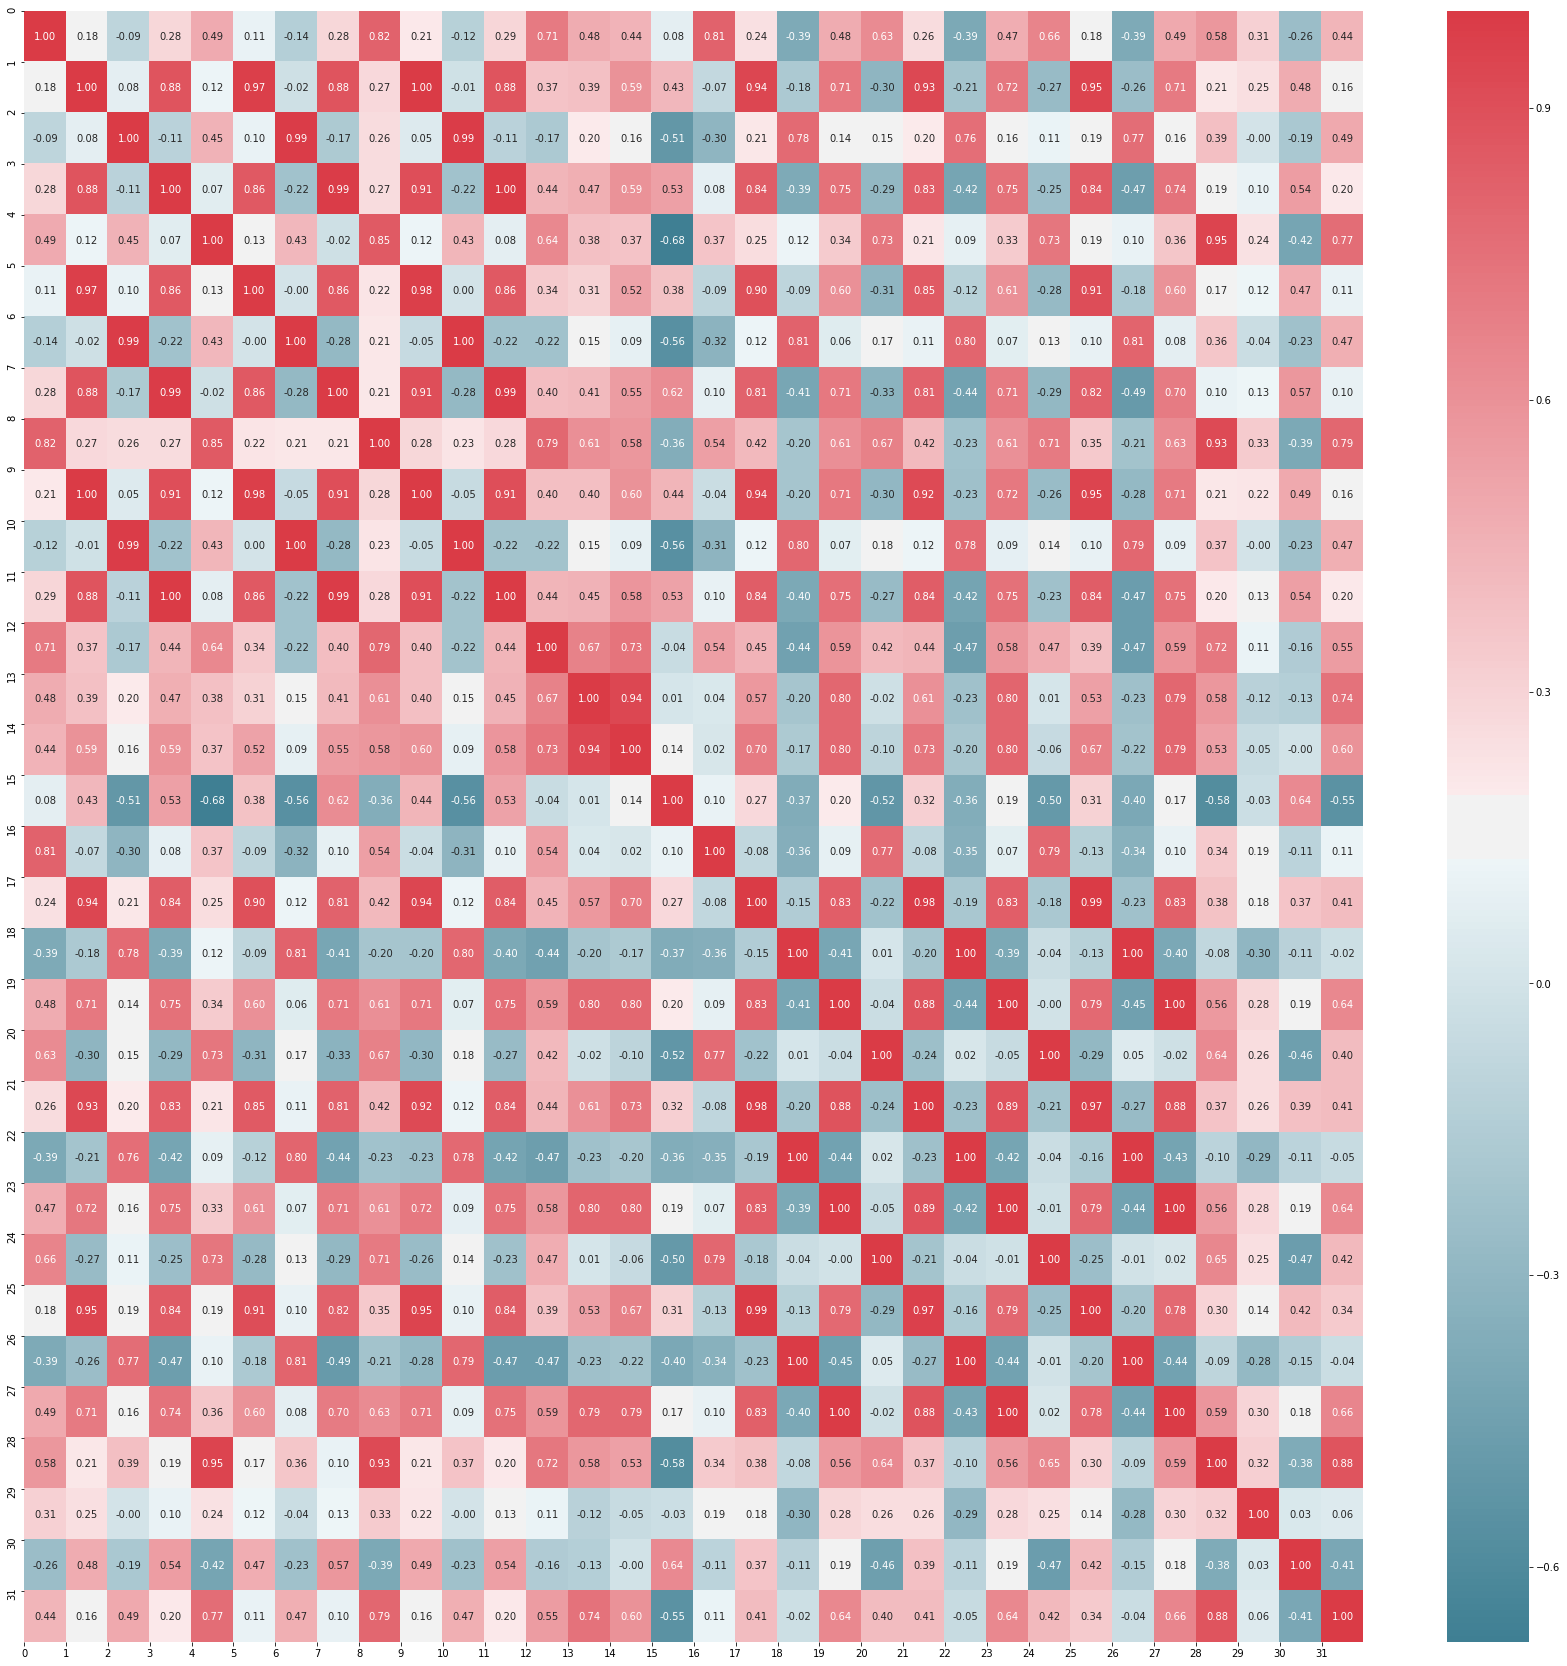

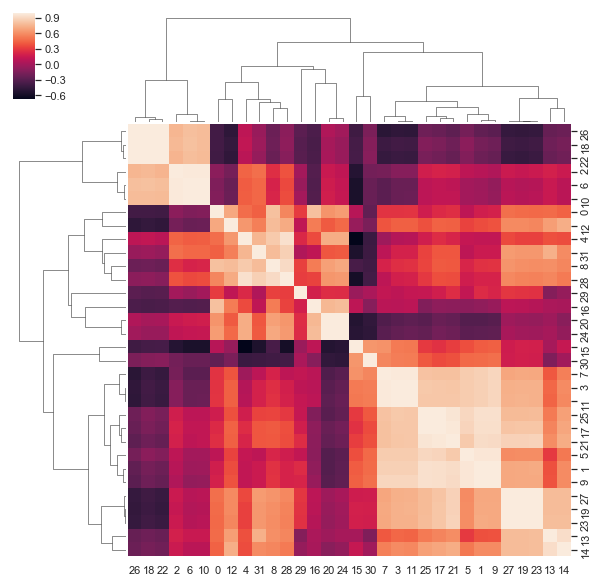

In [10]:
y1_64_feature=feature_get(preprocess(y1))
y1_64_feature_4_8beat=y1_64_feature.loc[:,0:31]
heatMap(y1_64_feature_4_8beat)
clusterMap(y1_64_feature_4_8beat,"one_two")

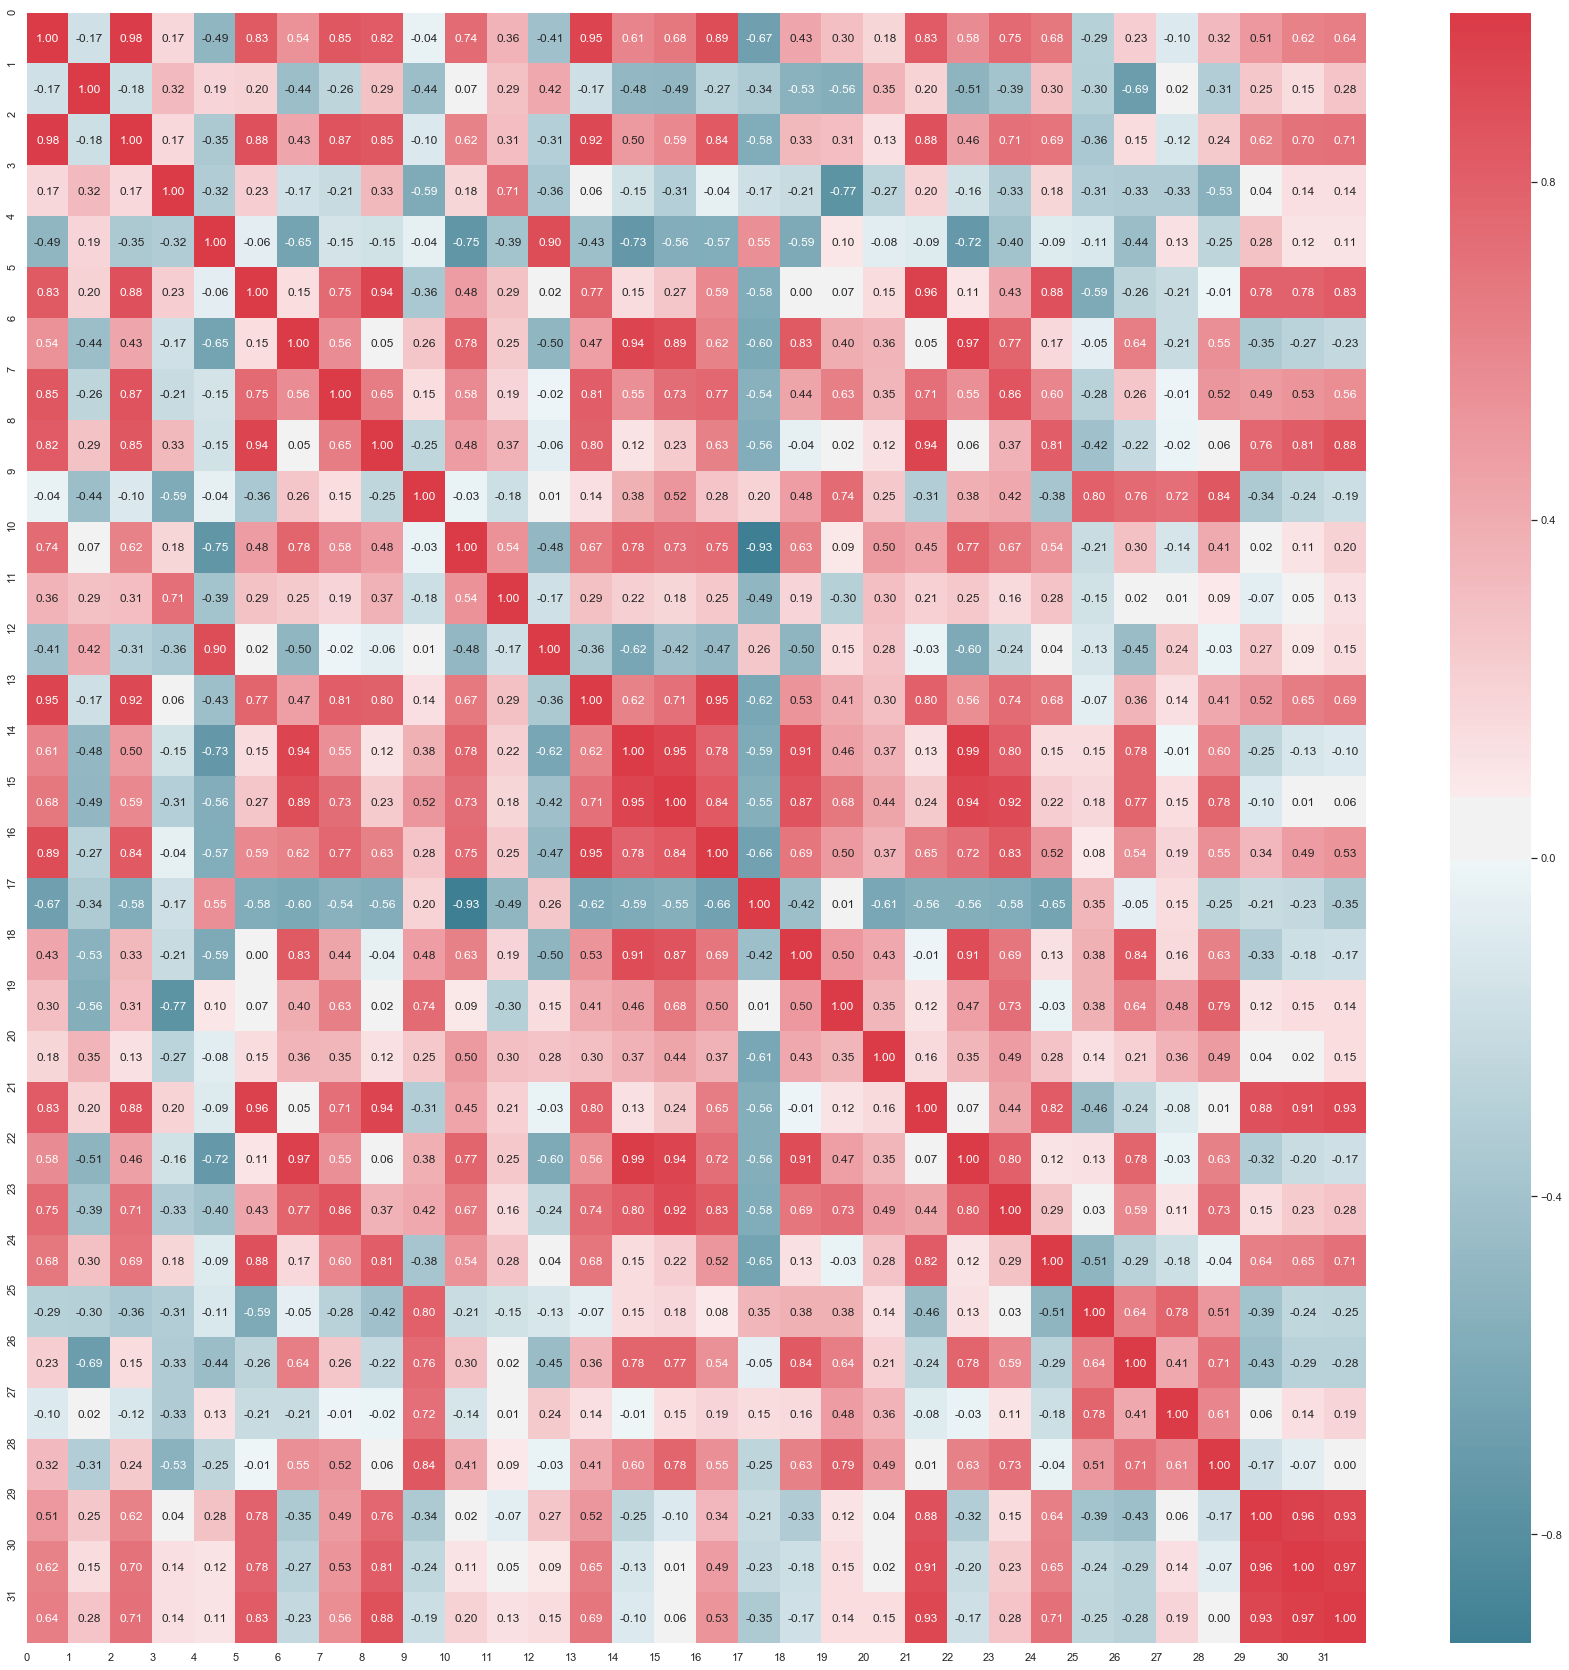

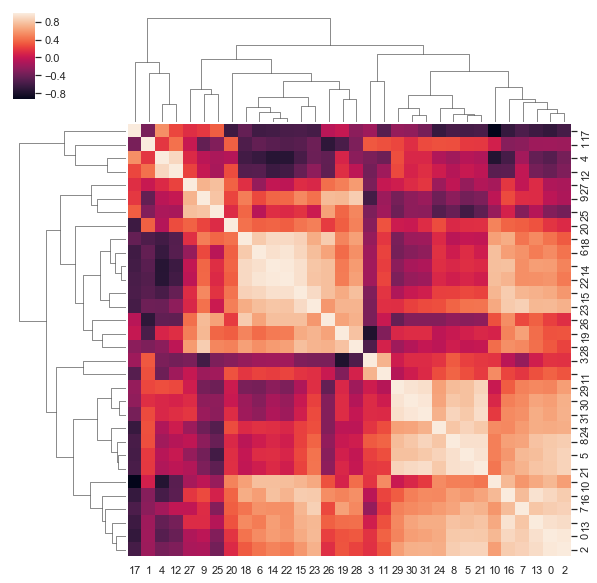

In [11]:
y1_64_feature=feature_get(preprocess(y2))
y1_64_feature_4_8beat=y1_64_feature.loc[:,0:31]
heatMap(y1_64_feature_4_8beat)
clusterMap(y1_64_feature_4_8beat,"skr")

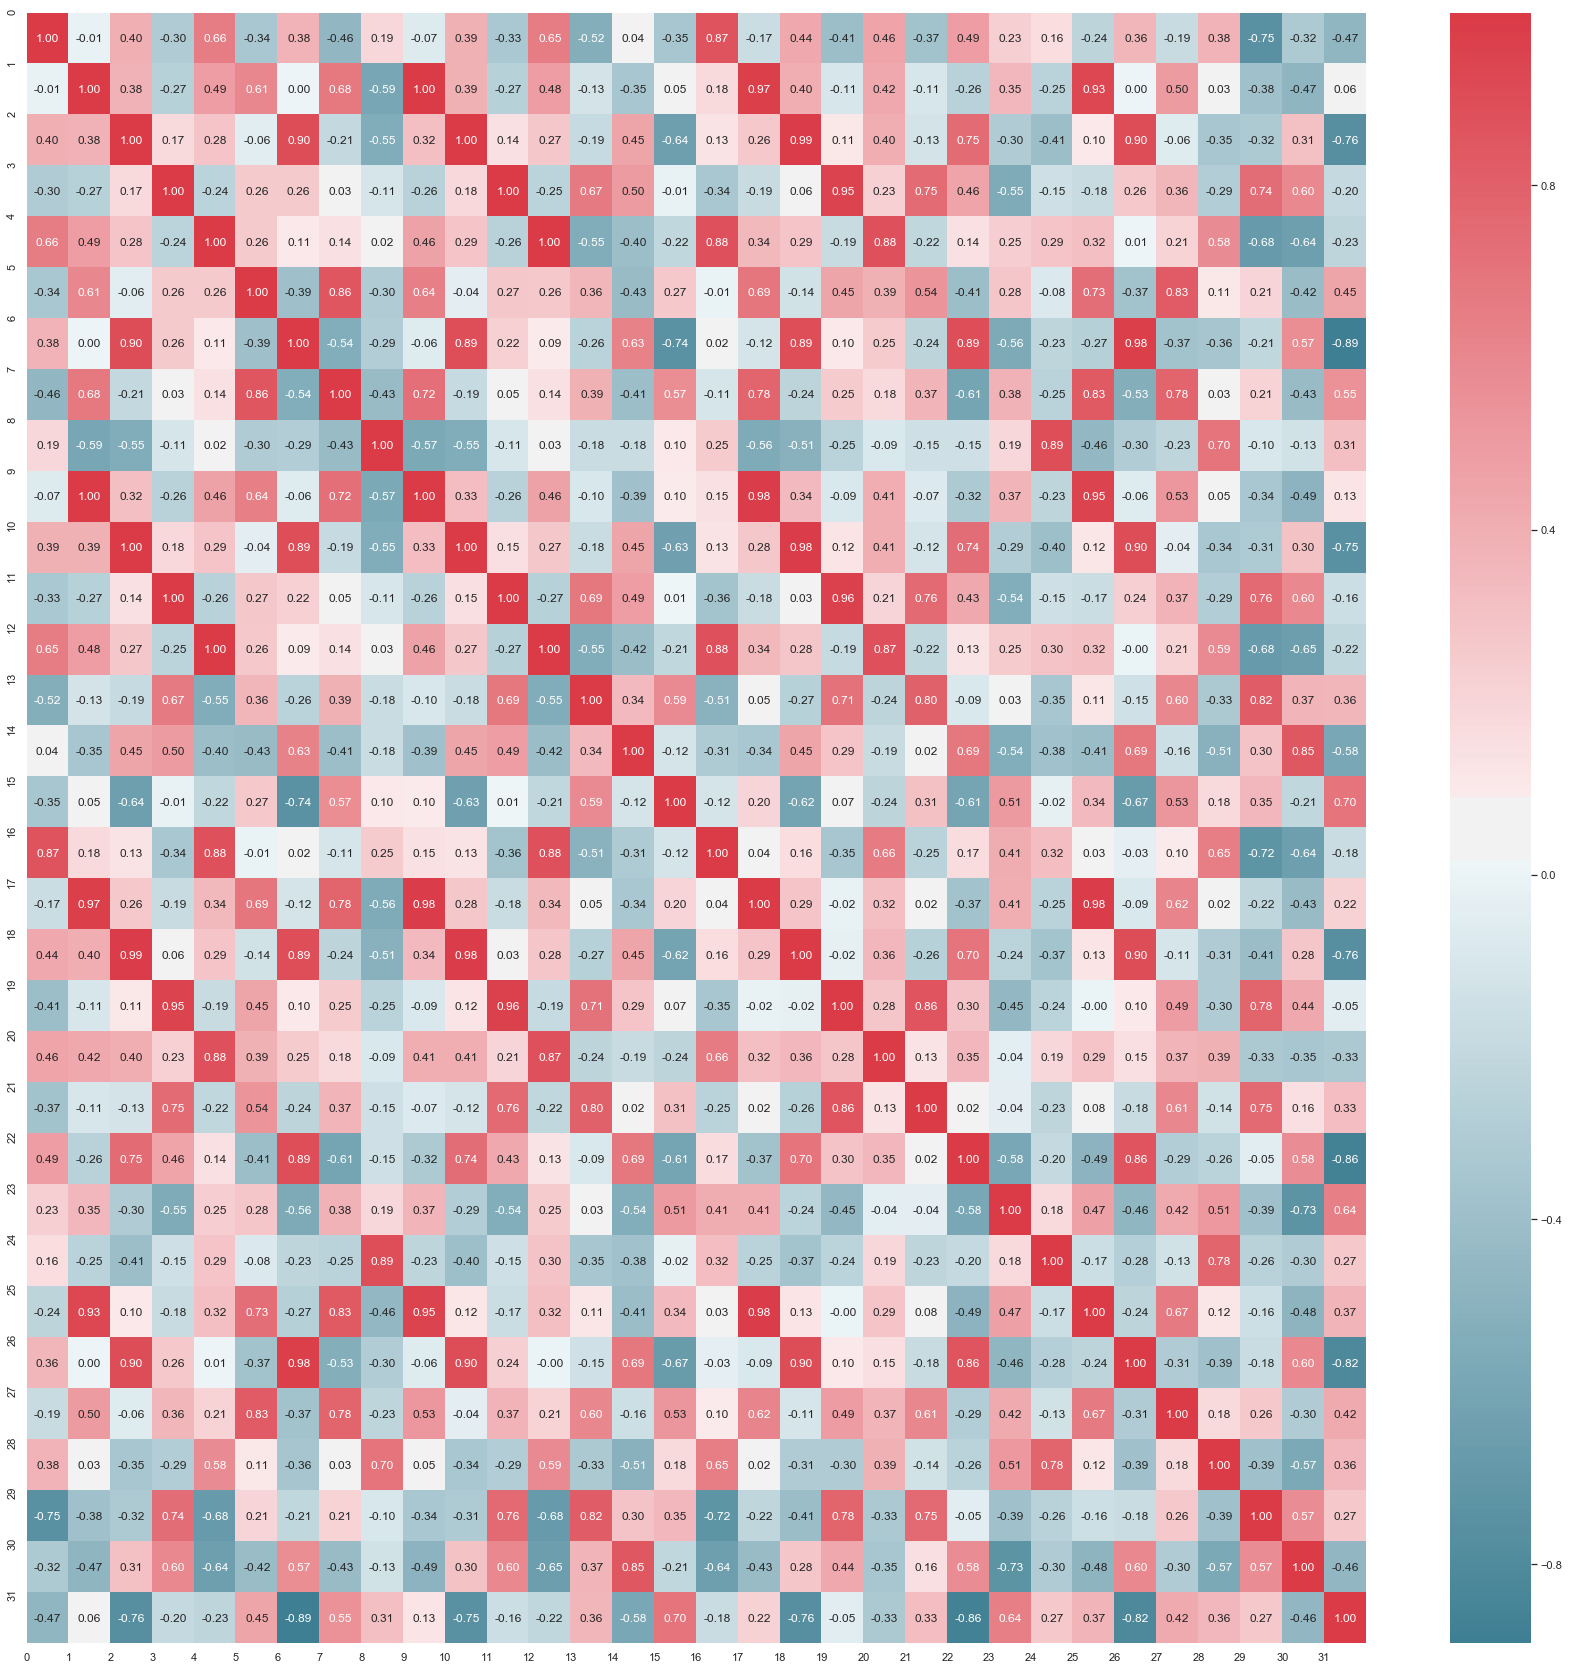

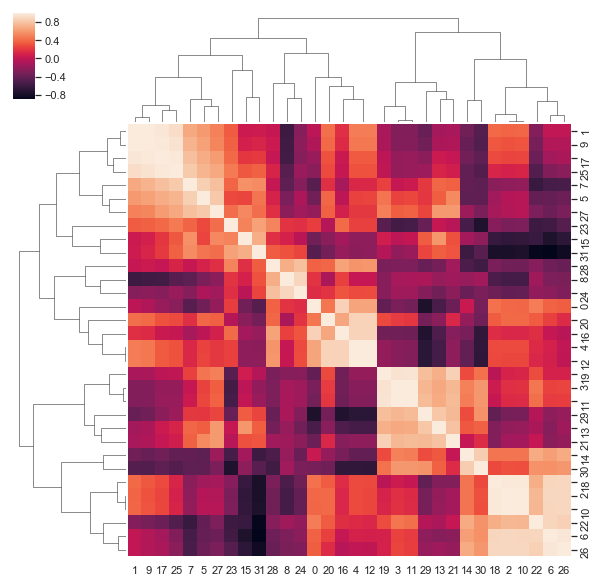

In [12]:
y1_64_feature=feature_get(preprocess(y3))
y1_64_feature_4_8beat=y1_64_feature.loc[:,0:31]
heatMap(y1_64_feature_4_8beat)
clusterMap(y1_64_feature_4_8beat,"ktn1")

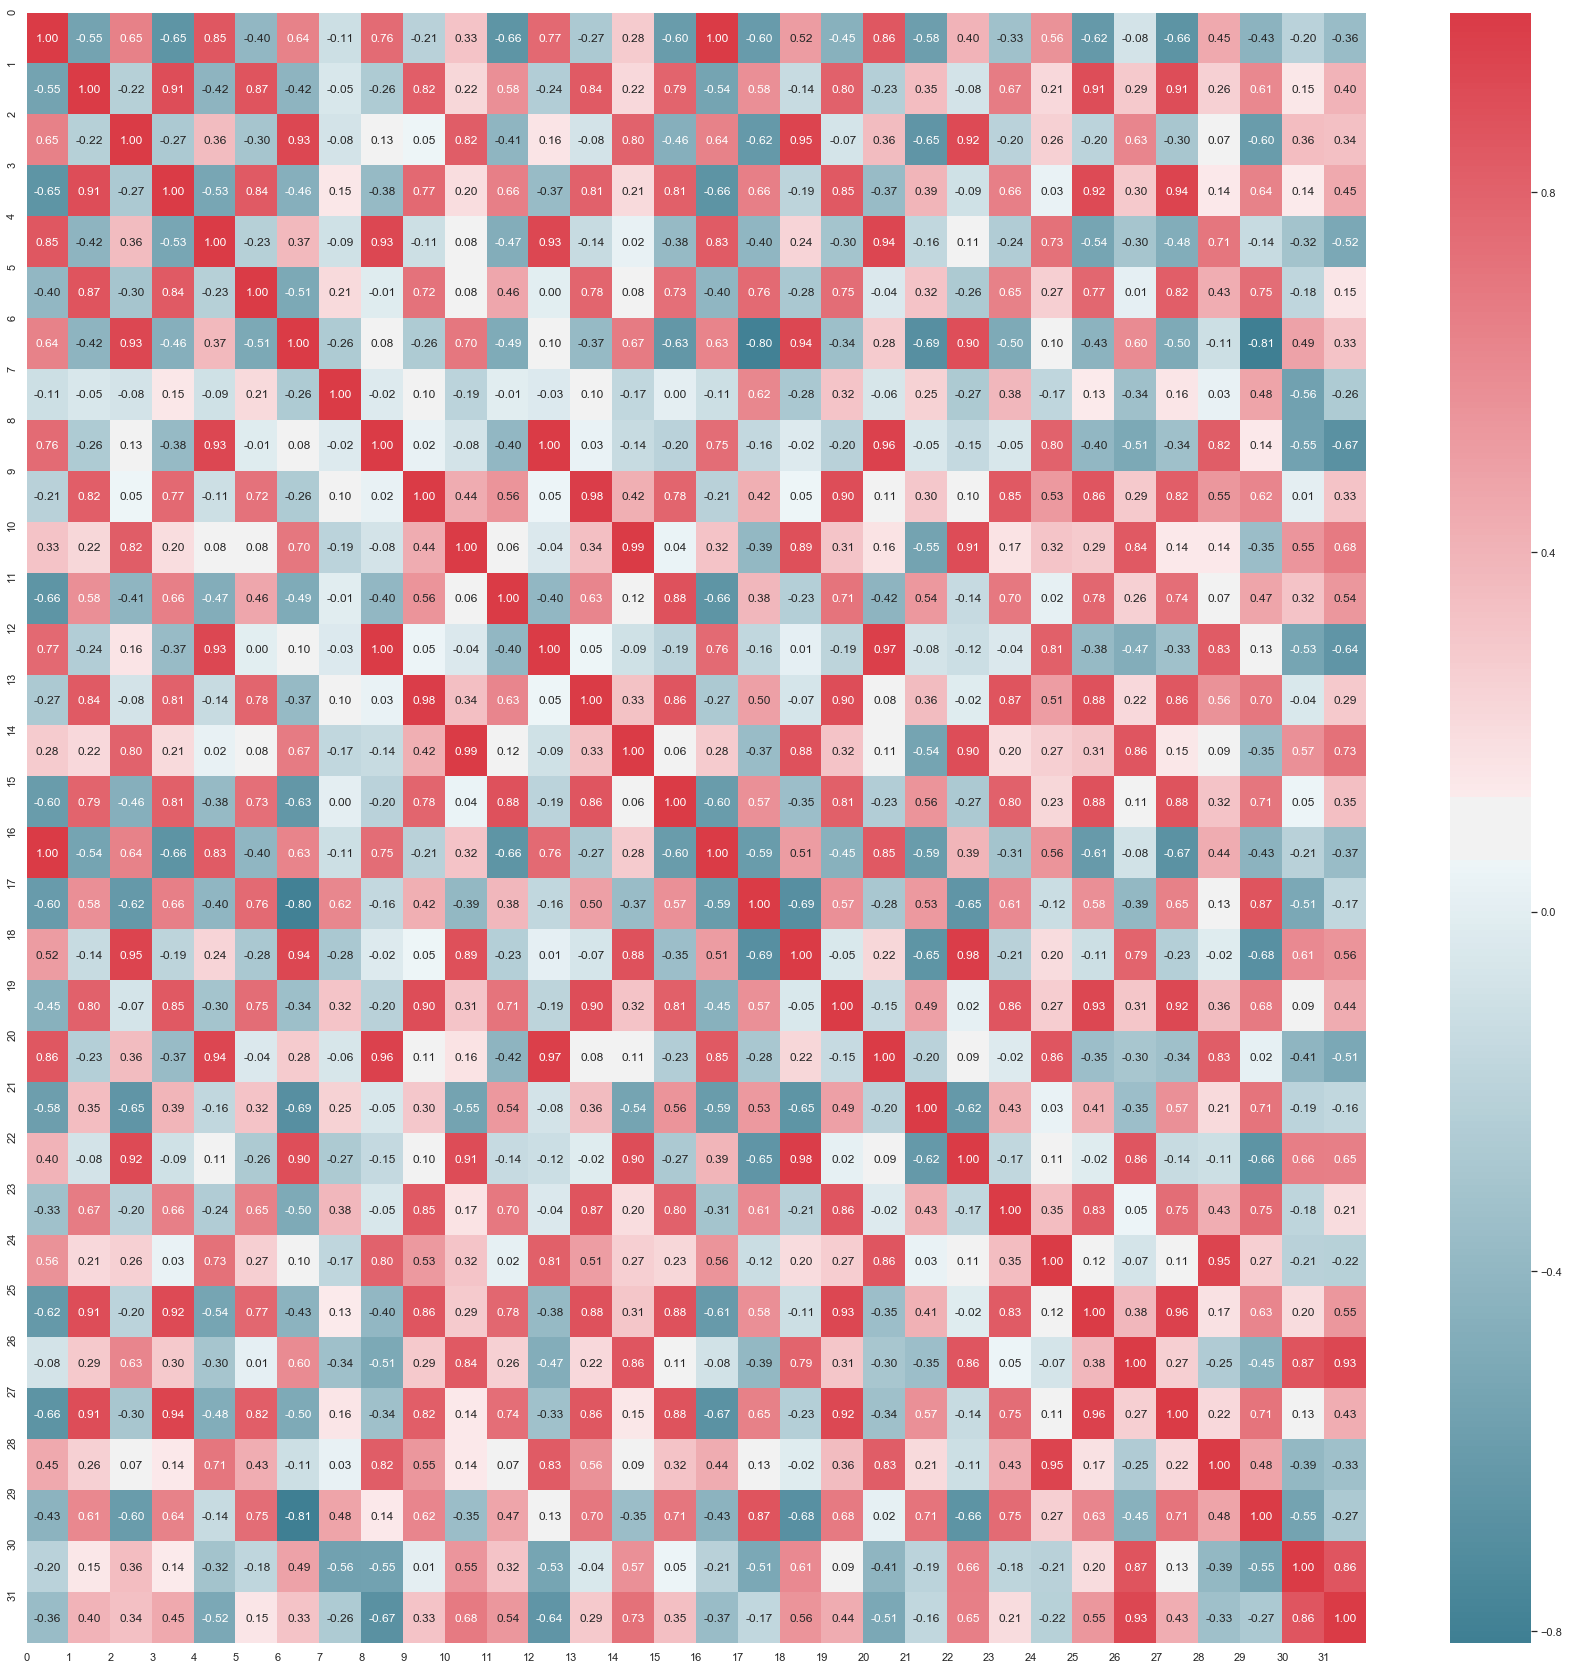

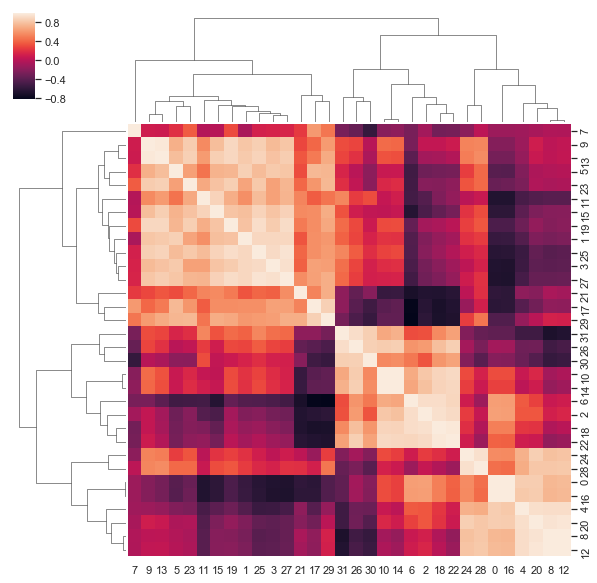

In [13]:
y1_64_feature=feature_get(preprocess(y4))
y1_64_feature_4_8beat=y1_64_feature.loc[:,0:31]
heatMap(y1_64_feature_4_8beat)
clusterMap(y1_64_feature_4_8beat,"ktn2")

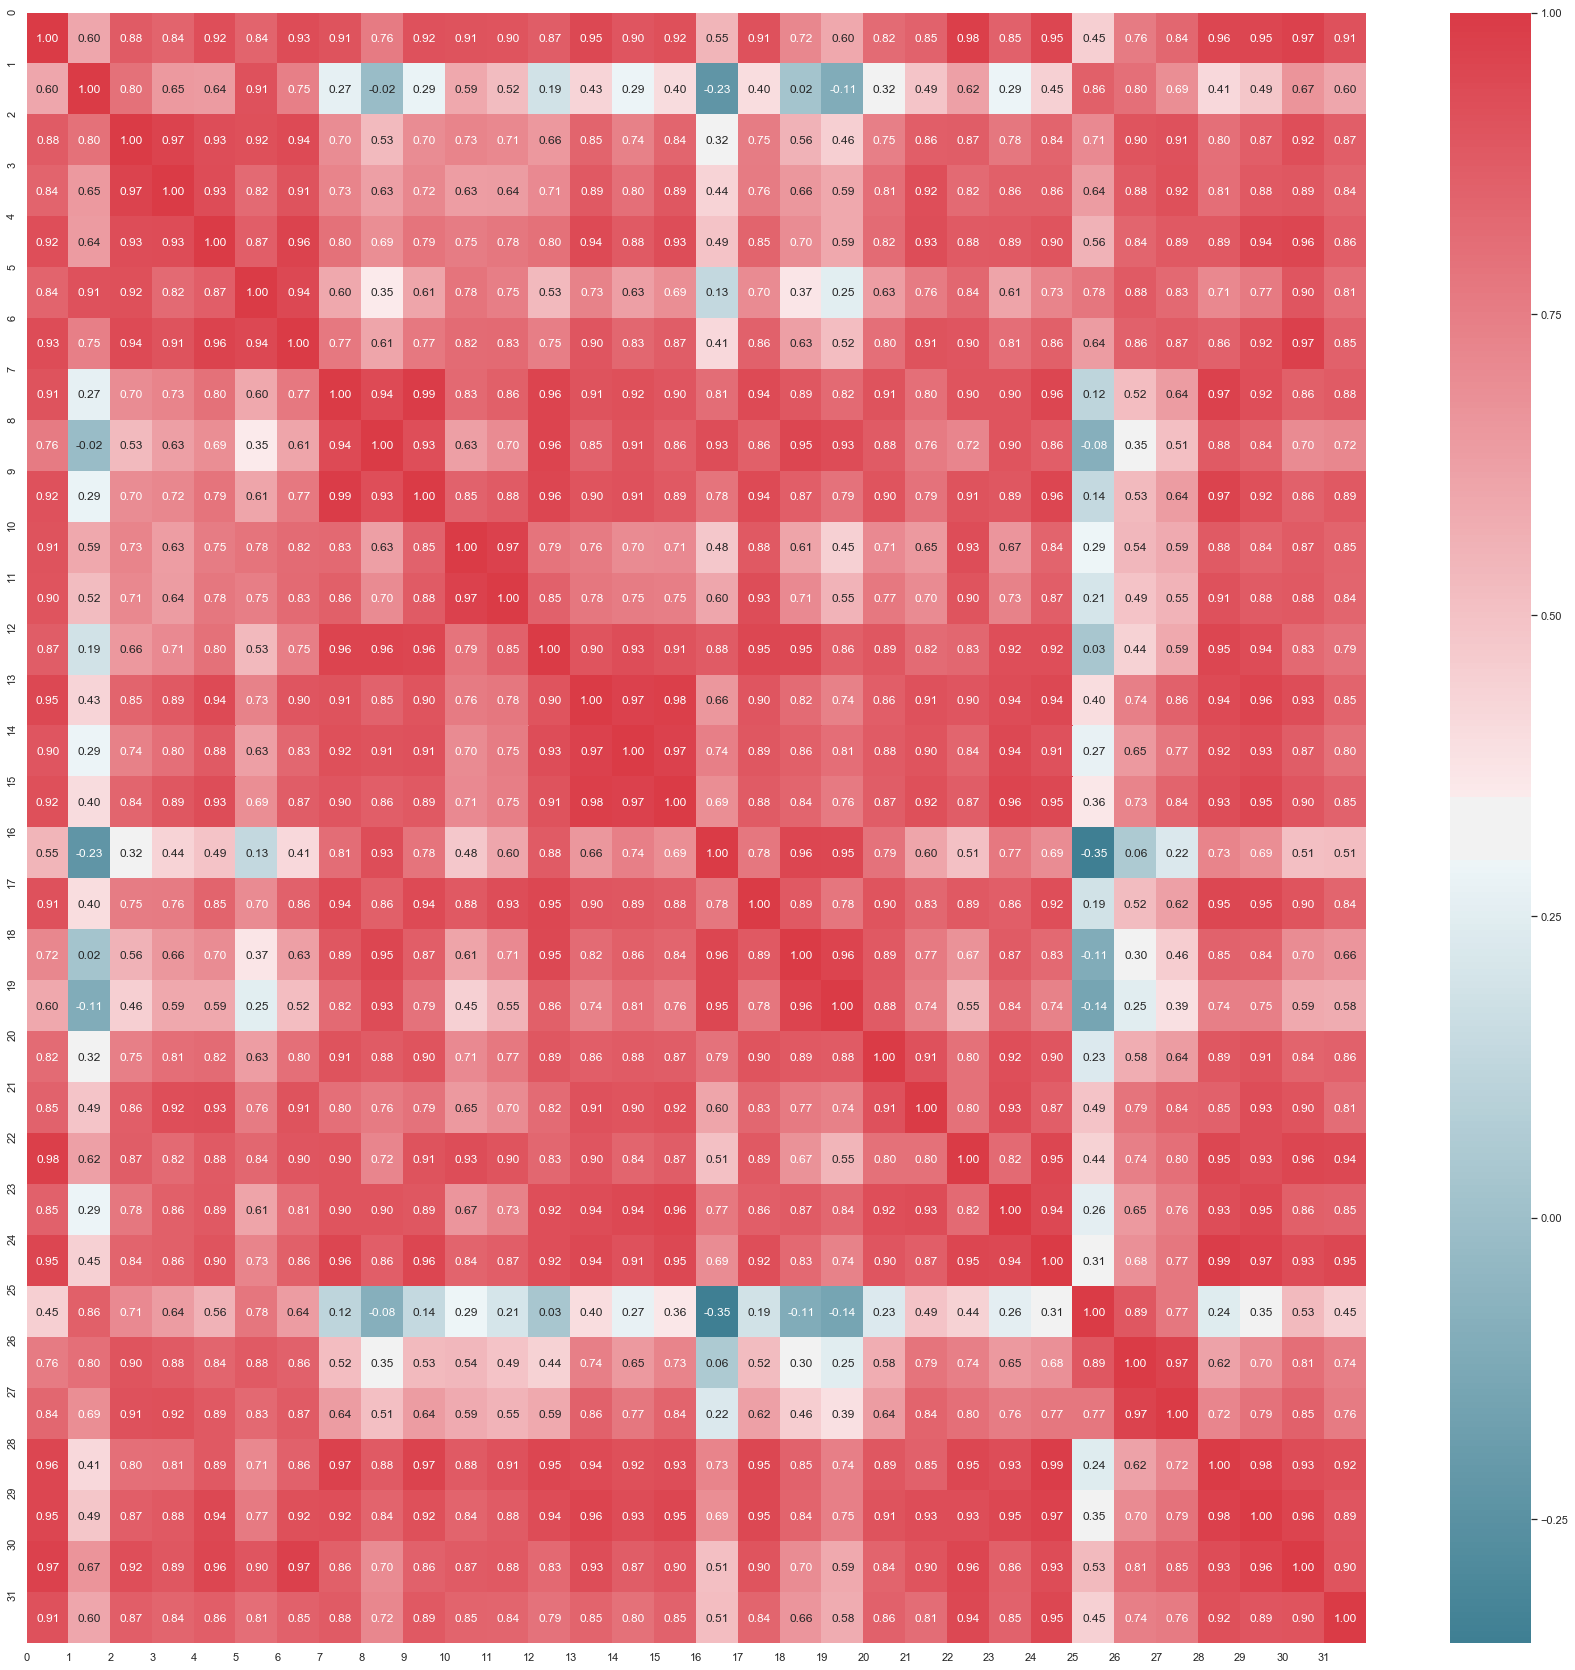

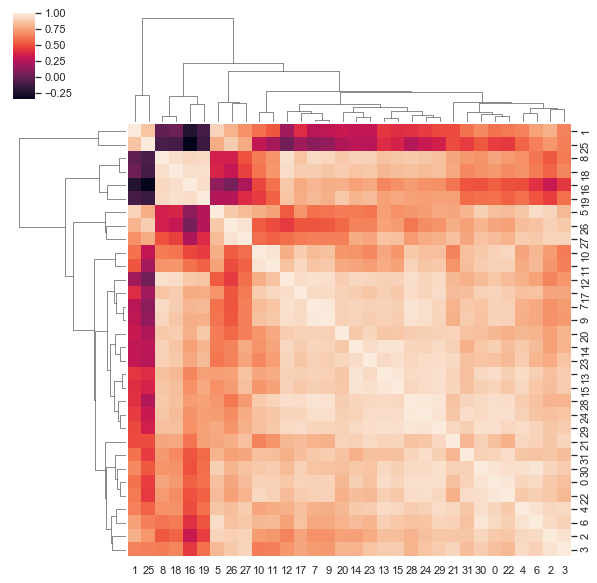

In [14]:
y1_64_feature=feature_get(preprocess(y5))
y1_64_feature_4_8beat=y1_64_feature.loc[:,0:31]
heatMap(y1_64_feature_4_8beat)
clusterMap(y1_64_feature_4_8beat,"ktn2")